<a href="https://colab.research.google.com/github/kh-ops69/Data_science/blob/master/Google_trend_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
df_tesla = pd.read_csv('Data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('Data/UE Benefits Search vs UE Rate 2004-20.csv')

In [ ]:
print(df_tesla.head(), '\n', df_btc_search.head(),'\n', df_btc_price.head(), '\n', df_unemployment.head())

        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368 
      MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5 
          DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0 
      MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                       9     5.7
1  2004-02                       8     5.6
2  2004-03                       7     5.8
3  2004-04                       8     5.6
4  2004-05                       6     5.6


# Data Exploration

### Tesla

In [ ]:
print(df_tesla.columns, '\n', df_btc_search.columns,'\n', df_btc_price.columns, '\n', df_unemployment.columns)

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object') 
 Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object') 
 Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object') 
 Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


In [ ]:
print(df_tesla.shape,df_btc_search.shape,df_btc_price.shape,df_unemployment.shape)

(124, 3) (73, 2) (2204, 3) (181, 3)


In [ ]:
largest = df_tesla['TSLA_WEB_SEARCH'].max()
smallest = df_tesla['TSLA_WEB_SEARCH'].min()
largest, smallest

(31, 2)

In [ ]:
print(f'Largest value for Tesla in Web Search: {largest}')
print(f'Smallest value for Tesla in Web Search: {smallest}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [ ]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [ ]:
df_tesla['MONTH'].sort_values(ascending=False)
print('periodicity=monthly')

periodicity=monthly


### Unemployment Data

In [ ]:
largest = df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()
value = df_unemployment[df_unemployment['UE_BENEFITS_WEB_SEARCH']==largest]
value

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
61,2009-02,100,8.3


In [ ]:
print('Largest value for "Unemployemnt Benefits in Web Search: ', '\n',
      f'{value}')

Largest value for "Unemployemnt Benefits in Web Search:  
       MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
61  2009-02                     100     8.3


### Bitcoin

In [ ]:
largest = df_btc_search['BTC_NEWS_SEARCH'].max()
value = df_btc_search[df_btc_search['BTC_NEWS_SEARCH']==largest]
value

,MONTH,BTC_NEWS_SEARCH
39,2017-12,100


# Data Cleaning

### Check for Missing Values

In [ ]:
df_tesla.isna().values.any()

False

In [ ]:
df_btc_price.isna().values.any()
df_btc_price.dropna(inplace=True)
df_btc_price.resample('Y', on='DATE').mean()
df_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


In [ ]:
type(df_tesla['TSLA_WEB_SEARCH'][1])

numpy.int64

In [ ]:
miss_tesla = df_tesla.isna()
miss_tesla

print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: ')

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 


In [ ]:
print(f'Missing values for BTC price?: ')

Missing values for BTC price?: 


In [ ]:
print(f'Number of missing values: ')

Number of missing values: 


**Challenge**: Remove any missing values that you found.

### Convert Strings to DateTime Objects

Checking the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects.

In [ ]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.YEAR = pd.to_datetime(df_btc_price.YEAR)

In [ ]:
trial = df_tesla.resample('Y', on='MONTH').last()
# trial.resample('Y', on='MONTH').mean()
# trial['MONTH'][0].split('-')
trial['Year'] = trial['MONTH'].dt.strftime('%Y')
YEAR = trial['Year']

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [ ]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [ ]:
df_btc_monthly_mean = df_btc_price.resample('M', on='DATE').mean()
df_btc_yearly_mean = df_btc_price.resample('Y', on='DATE').mean()

In [ ]:
df_btc_yearly_mean.shape
df_btc_yearly_mean.head()
# for i in range(df_btc_monthly.shape[1]):
#   print(type(df_btc_monthly['DATE'][i]))

,CLOSE,VOLUME
DATE,,
2014-12-31,363.693085,2.383690e+07
2015-12-31,272.453381,3.390557e+07
2016-12-31,568.492407,8.592451e+07
2017-12-31,4006.033629,2.382867e+09
2018-12-31,7572.298947,6.063552e+09


In [ ]:
df_btc_monthly_mean.index.year

Int64Index([2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016,
            2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017,
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018,
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020,
            2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='DATE')

in case of every month, we wanted to know the mean value of all the results from each day and then resample the data


# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Create locators for ticks on the time axis

In [ ]:
# Register date converters to avoid warning messages during datetime conversion
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

Plotting the Tesla stock price against the Tesla search volume using a line chart and two different axes.

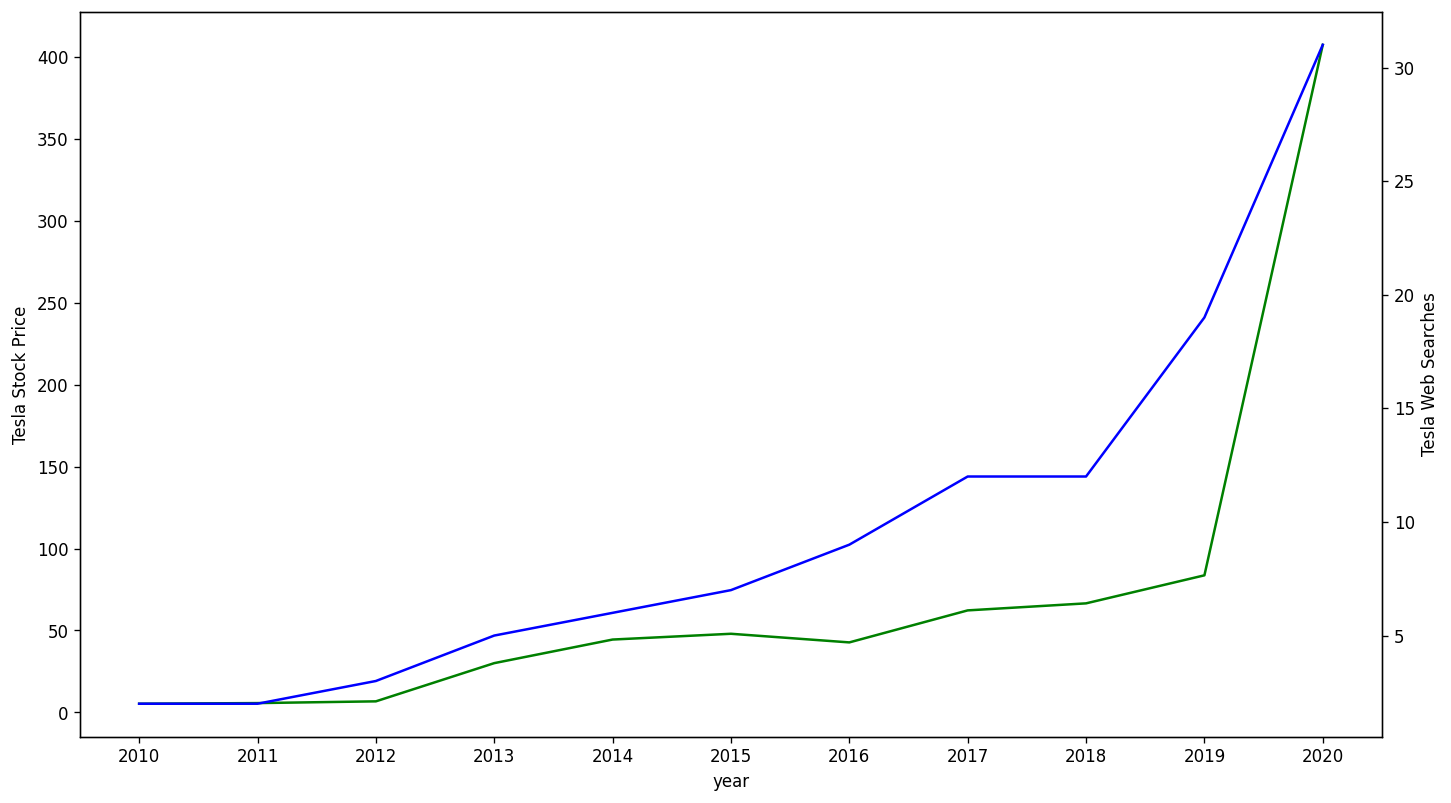

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(YEAR, trial['TSLA_USD_CLOSE'], color='g')
ax2.plot(YEAR, trial['TSLA_WEB_SEARCH'], 'b')
ax1.set_xlabel('year')
ax1.set_ylabel('Tesla Stock Price')
ax2.set_ylabel('Tesla Web Searches')
# ax1.set_ylim([0, 600])
# ax1.set_xlim([trial['TSLA_USD_CLOSE'].min(), trial['TSLA_WEB_SEARCH'].max()])
# ax1.xaxis.set_major_locator(year)
# ax1.xaxis.set_major_formatter(yrs_fmt)
plt.show()

How to add tick formatting for dates on the x-axis.

In [ ]:
year = mdates.YearLocator()
month = mdates.MonthLocator()
yrs_fmt = mdates.DateFormatter('%Y')

### Bitcoin (BTC) Price v.s. Search Volume

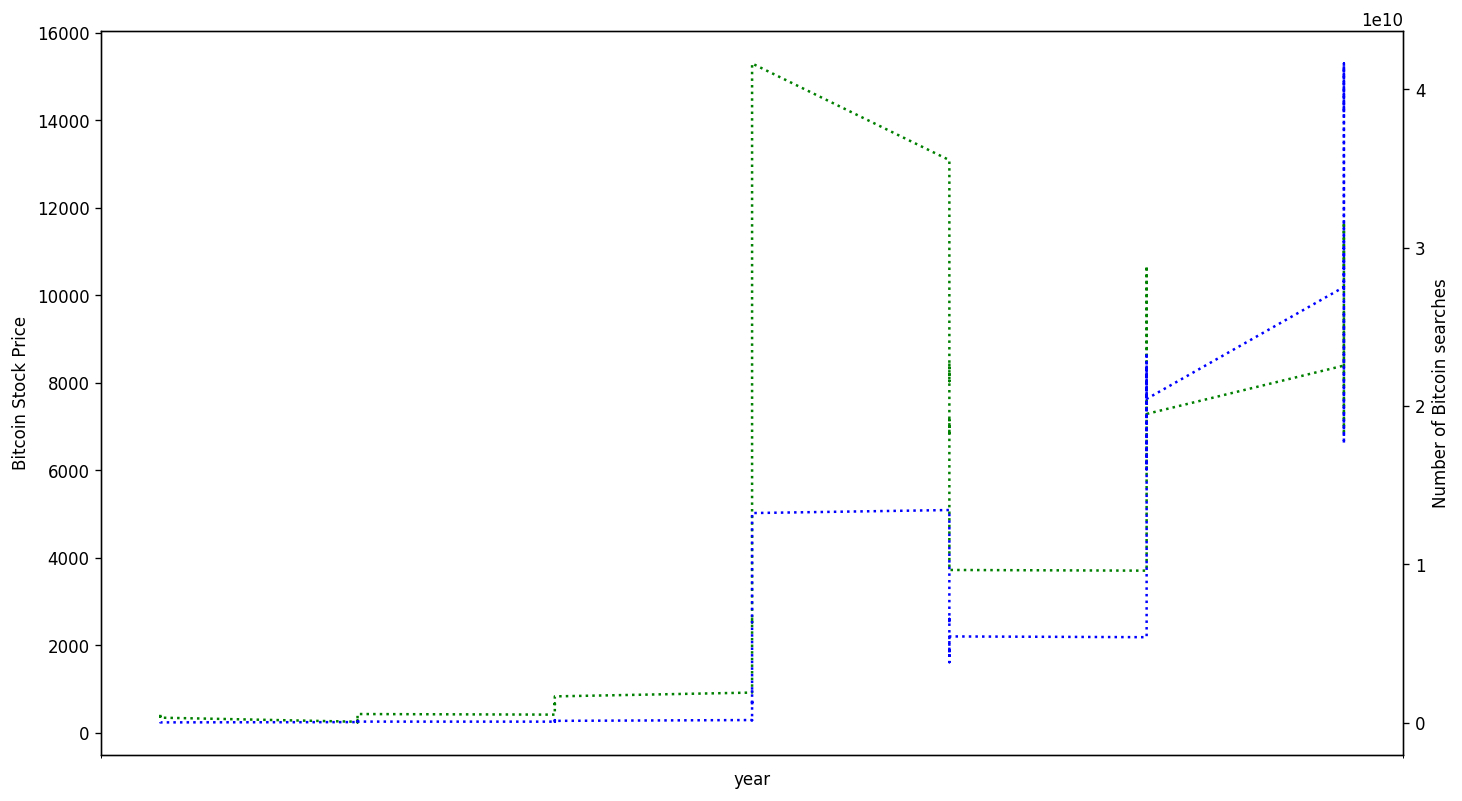

In [ ]:
plt.figure(figsize=(14,8), dpi=120)
bx1 = plt.gca()
bx2 = bx1.twinx()
bx1.plot(df_btc_monthly_mean.index.year, df_btc_monthly_mean.CLOSE,color='g', linestyle='dotted')
bx2.plot(df_btc_monthly_mean.index.year, df_btc_monthly_mean.VOLUME, 'b', linestyle='dotted')
bx1.set_xlabel('year')
bx1.set_ylabel('Bitcoin Stock Price')
bx2.set_ylabel('Number of Bitcoin searches')
# ax1.set_ylim([0, 600])
# ax1.set_xlim([trial['TSLA_USD_CLOSE'].min(), trial['TSLA_WEB_SEARCH'].max()])
bx1.xaxis.set_major_locator(year)
bx1.xaxis.set_major_formatter(yrs_fmt)
bx1.xaxis.set_minor_locator(month)

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

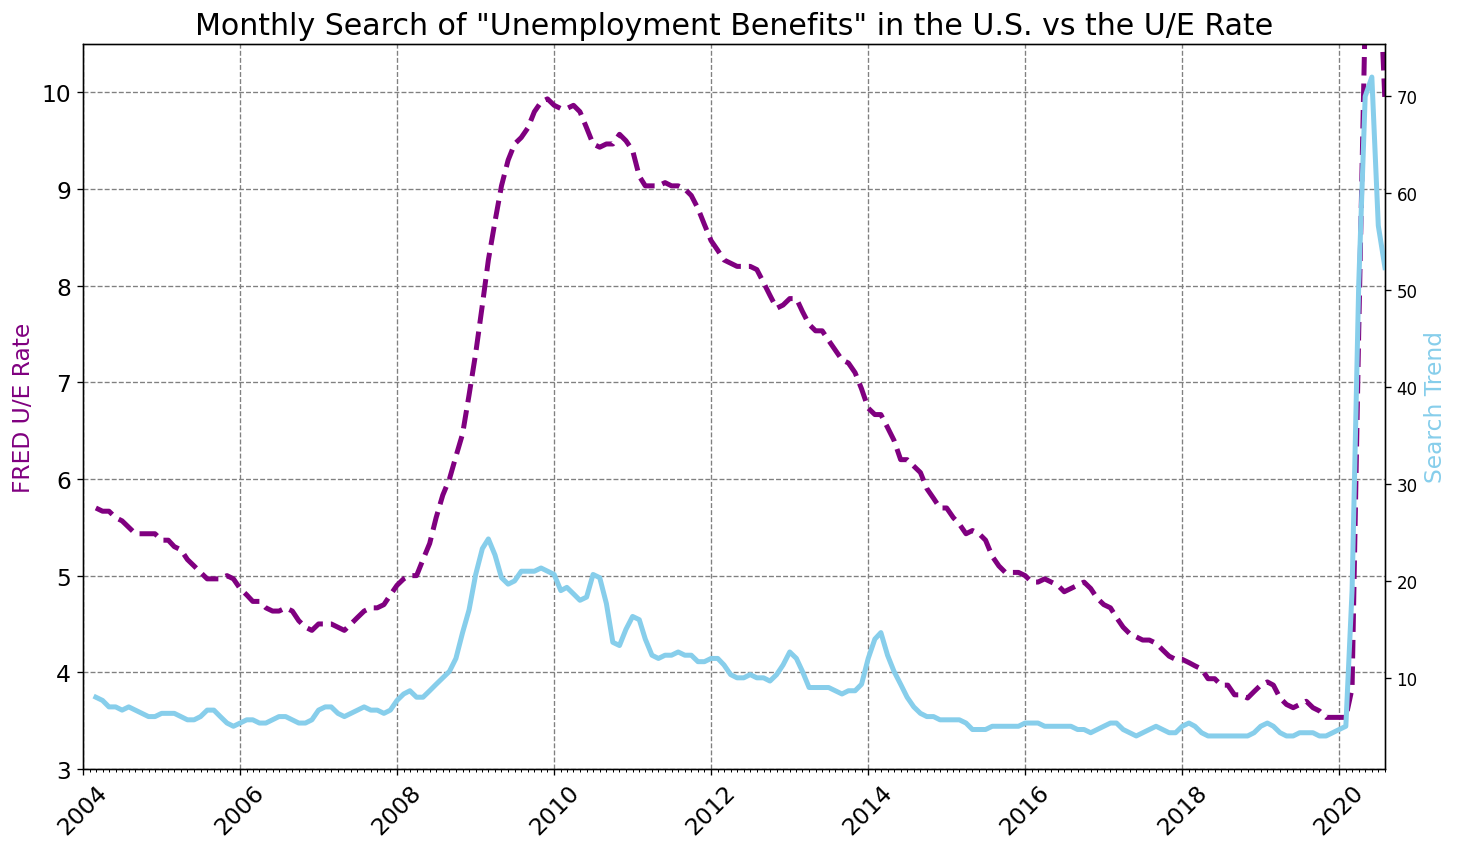

In [ ]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=3).mean()
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(yrs_fmt)
ax1.xaxis.set_minor_locator(month)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

plt.show()

In [ ]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
roll_df

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
195,27.666667,5.533333
196,37.500000,7.166667
197,45.500000,8.433333
198,53.666667,9.533333
